用级联结构实现如下系统函数的IIR数字滤波器，并求单位脉冲响应和单位阶跃响应。
$$H(z)=\frac{ \sum_{r=0}^{M}{b_rz^{-r}}}{1- \sum_{k=1}^{N}{a_kz^{-k}}}=\frac{3(1+z^{-1})(1-3.14z^{-1}+z^{-2})}{(1-0.6z^{-1})(1+0.7z^{-1}+0.72z^{-2})}$$

In [1]:
##导入使用的库libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

d:\code\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\code\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
d:\code\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
#定义差分方程参数parameters of defference equation
A = 3;b = np.array([[1,1,0],[1,-3.14,1]]) #numerator
a = np.array([[1,-0.6,0],[1,0.7,0.72]]) #denominator

In [3]:
#定义输入信号iinput signal
M = a.shape[0];N = 30
delta = signal.unit_impulse(N) #unit sample signal
y = np.ones(N) #unit step signal


In [4]:
#计算IIR数字滤波器
z1 = np.zeros((M+1,N));z2 = np.zeros((M+1,N));
z1[0,:] = delta;z2[0,:] = y; 
for i in range(M): #循环滤波，计算最终结果
    zi = signal.lfilter_zi(b[i,:],a[i,:])*0 #zero initial condition
    z1[i+1,:],_ = signal.lfilter(b[i,:],a[i,:],z1[i,:],zi=zi);
    z2[i+1,:],_ = signal.lfilter(b[i,:],a[i,:],z2[i,:],zi=zi);

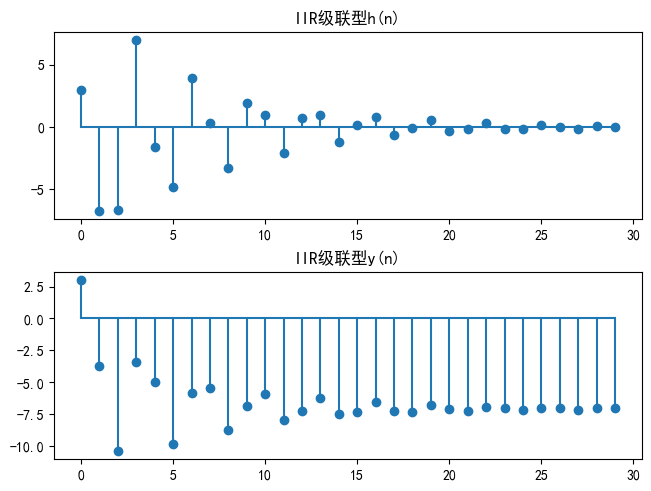

In [5]:
#绘制单位脉冲响应和单位阶跃响应
fig,axs = plt.subplots(2,1,constrained_layout=True)
axs[0].stem(A*z1[M,:],basefmt="");axs[1].stem(A*z2[M,:],basefmt="")
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来显示负号
axs[0].set_title('IIR级联型h(n)');axs[1].set_title('IIR级联型y(n)')
plt.show();fig.savefig('./iir_cas_sequence.png',dpi=500)


In [6]:
%pwd

'D:\\yanyi\\python数字信号处理图书修改'